# Plotly Express

- Plotly: インタラクティブなデータ可視化
- Plotly Express: plotly.py の高レベル API，簡潔なコードによるデータ可視化

Ploty Expressのほうがかんたんに記述できるため、まずはPlotly Expressからはじめることをおすすめします

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
btceur = pd.read_pickle("../data/binance_btc-eur.pkl")
etheur = pd.read_pickle("../data/binance_eth-eur.pkl")

In [3]:
def make_resample_df(df, rule):
    new_df = df.loc[:, "price"].resample(rule, label="right").ohlc()
    new_df.reset_index(inplace=True)
    new_df.loc[:, "volume"] = df.loc[:, "size"].resample(rule, label="right").sum()
    new_df.loc[:, "instrument"] = df.loc[df.index[0], "instrument"]
    new_df.loc[:, "pct_change"] = new_df.loc[:, "close"].pct_change()
    new_df.loc[:, "day_name"] = new_df.loc[:, "datetime"].dt.day_name()
    return new_df

In [4]:
resample_btceur_5min = make_resample_df(btceur, "60min")
resample_etheur_5min = make_resample_df(etheur, "60min")
resample_5min = pd.concat([resample_btceur_5min, resample_etheur_5min])

In [5]:
resample_btceur_5min.head()

datetime      open      high       low     close  volume  \
0 2022-03-01 01:00:00+00:00  38500.00  39014.56  38500.00  38882.82     NaN   
1 2022-03-01 02:00:00+00:00  38883.49  38932.19  38580.47  38611.40     NaN   
2 2022-03-01 03:00:00+00:00  38611.61  38642.27  38362.82  38525.47     NaN   
3 2022-03-01 04:00:00+00:00  38525.47  38553.72  38275.12  38531.29     NaN   
4 2022-03-01 05:00:00+00:00  38525.02  38738.82  38463.30  38690.69     NaN   

  instrument  pct_change day_name  
0    btc-eur         NaN  Tuesday  
1    btc-eur   -0.006980  Tuesday  
2    btc-eur   -0.002226  Tuesday  
3    btc-eur    0.000151  Tuesday  
4    btc-eur    0.004137  Tuesday

In [6]:
resample_etheur_5min.head()

datetime     open     high      low    close  volume  \
0 2022-03-01 01:00:00+00:00  2605.42  2653.14  2604.59  2631.00     NaN   
1 2022-03-01 02:00:00+00:00  2632.00  2632.88  2600.06  2603.31     NaN   
2 2022-03-01 03:00:00+00:00  2603.42  2607.36  2592.52  2604.11     NaN   
3 2022-03-01 04:00:00+00:00  2604.73  2604.73  2580.31  2599.68     NaN   
4 2022-03-01 05:00:00+00:00  2599.68  2616.61  2594.24  2611.06     NaN   

  instrument  pct_change day_name  
0    eth-eur         NaN  Tuesday  
1    eth-eur   -0.010525  Tuesday  
2    eth-eur    0.000307  Tuesday  
3    eth-eur   -0.001701  Tuesday  
4    eth-eur    0.004377  Tuesday

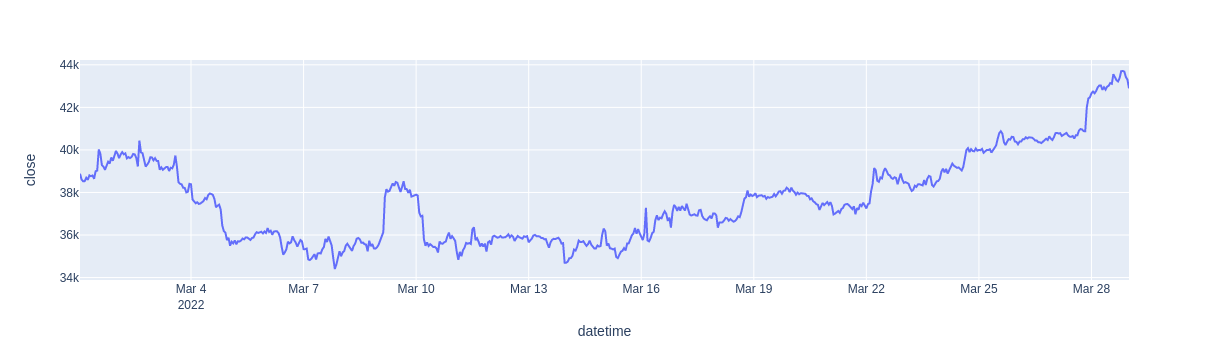

In [7]:
px.line(resample_btceur_5min, x="datetime", y="close")

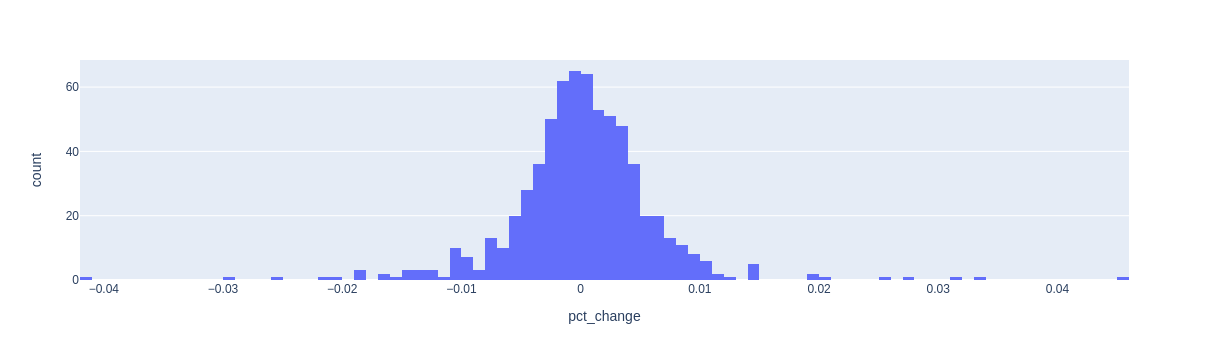

In [8]:
px.histogram(resample_btceur_5min, x="pct_change")

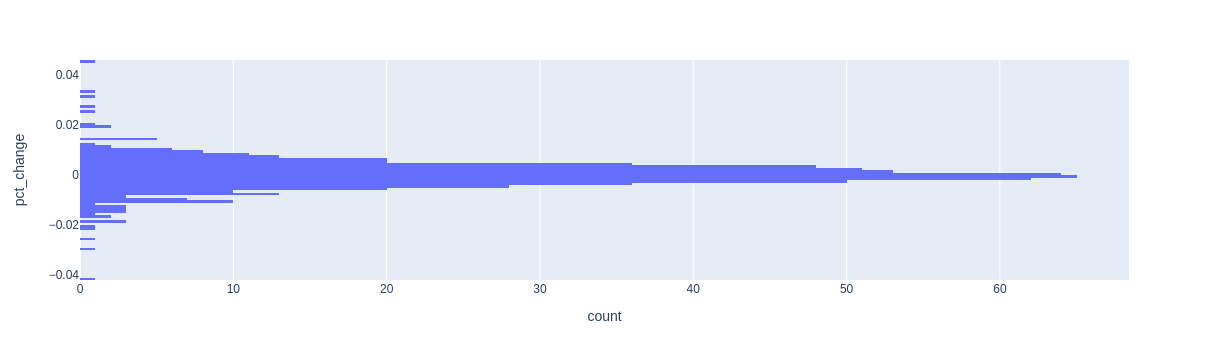

In [9]:
px.histogram(resample_btceur_5min, y="pct_change")

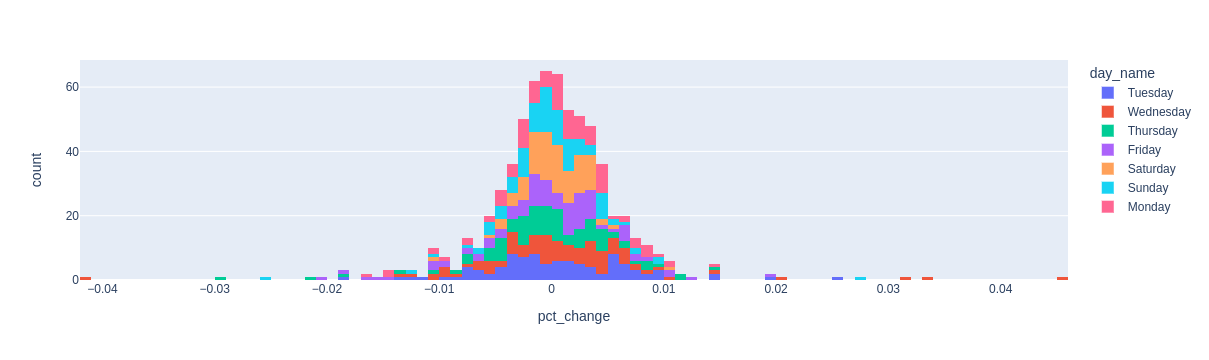

In [10]:
px.histogram(resample_btceur_5min, x="pct_change", color="day_name")

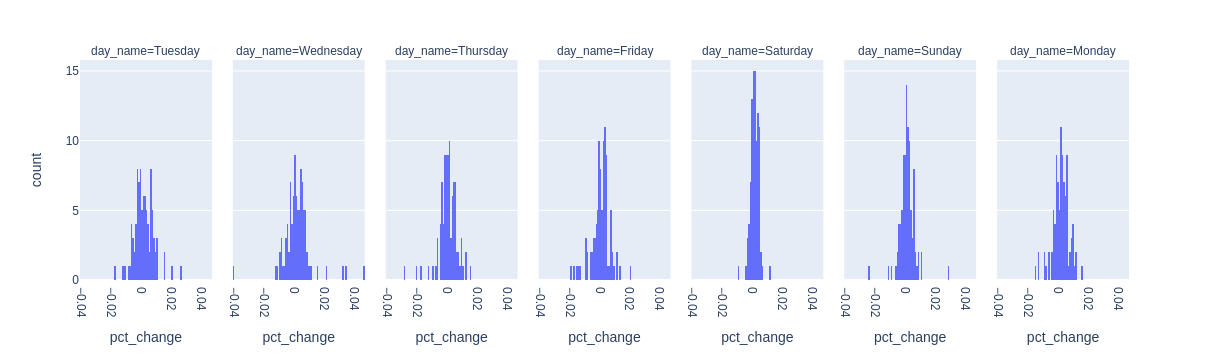

In [11]:
px.histogram(resample_btceur_5min, x="pct_change", facet_col="day_name")

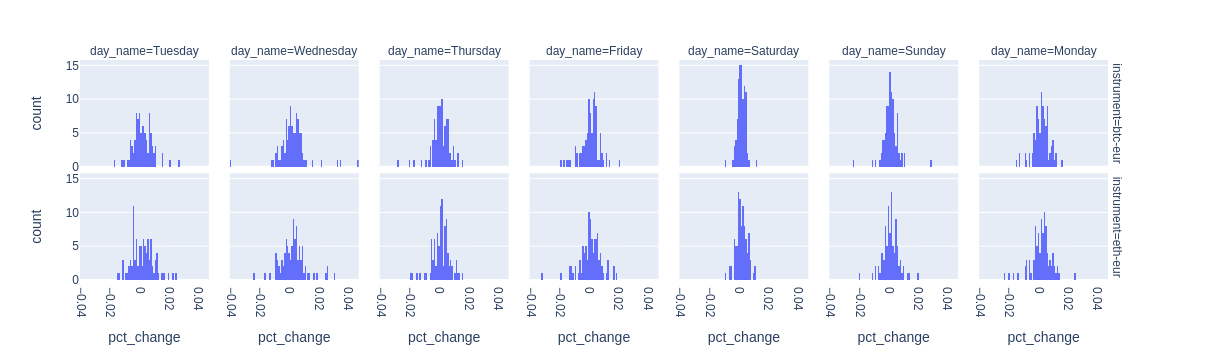

In [12]:
px.histogram(resample_5min, x="pct_change", facet_col="day_name", facet_row="instrument")

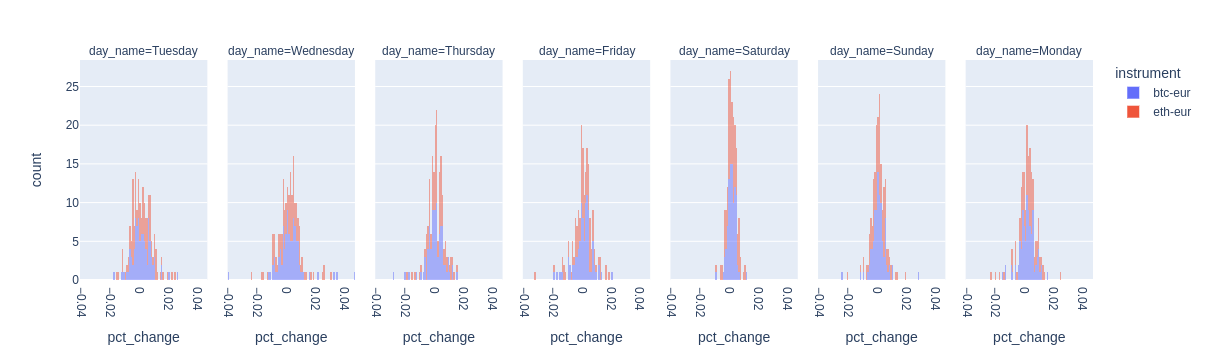

In [13]:
px.histogram(resample_5min, x="pct_change", color="instrument", facet_col="day_name", opacity=0.5)

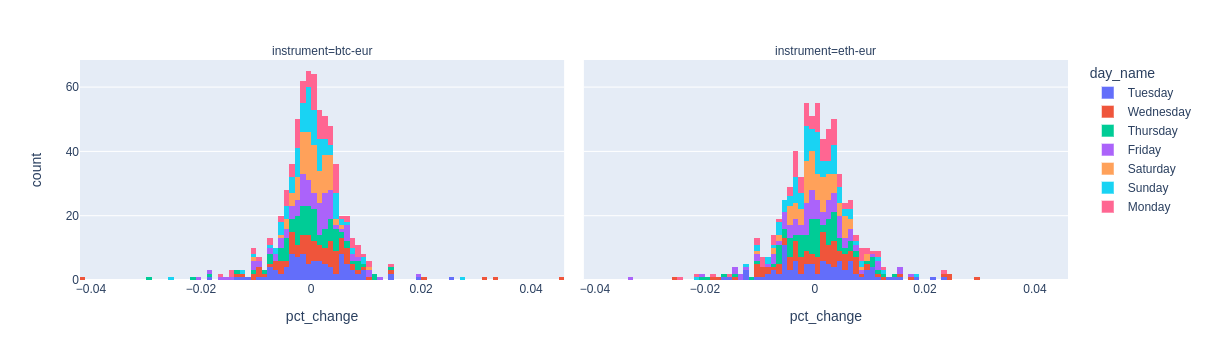

In [14]:
px.histogram(resample_5min, x="pct_change", color="day_name", facet_col="instrument")

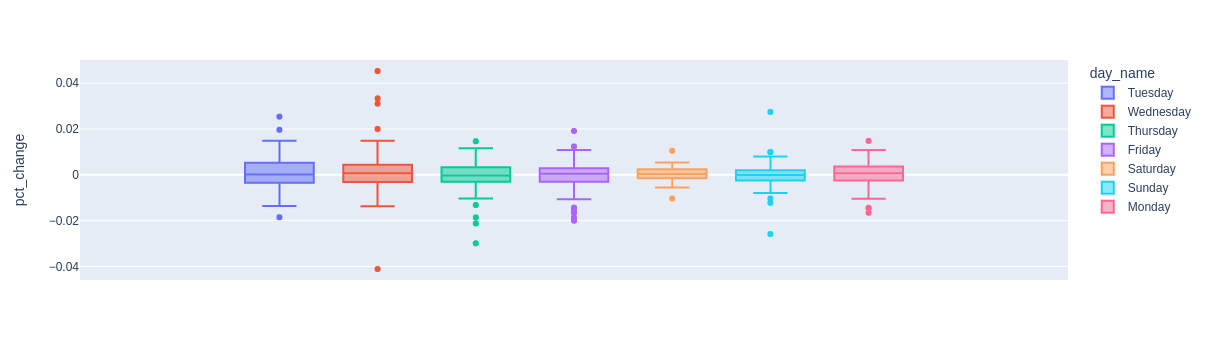

In [15]:
px.box(resample_btceur_5min, y="pct_change", color="day_name")

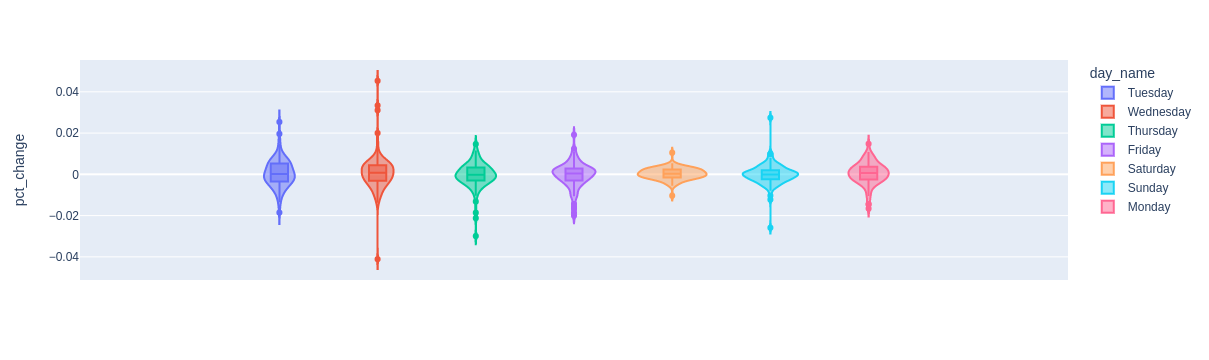

In [16]:
px.violin(resample_btceur_5min, y="pct_change", color="day_name", box=True)

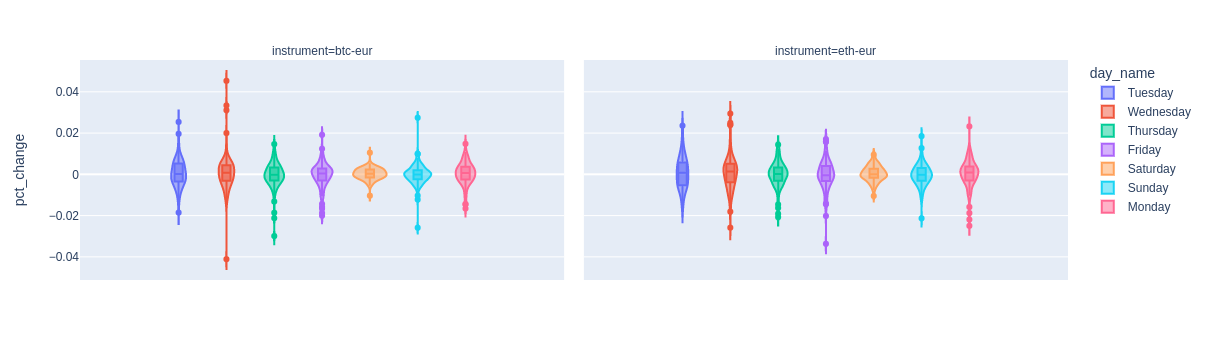

In [17]:
px.violin(resample_5min, y="pct_change", color="day_name", box=True, facet_col="instrument")